## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric)
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


%matplotlib inline


warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("./bank-additional-full.csv", sep=";")
display(data.head(3))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print("Статистична інформація:")
data.describe()

Статистична інформація:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
print(f"Розмірність датасету: {data.shape}")

Розмірність датасету: (41188, 21)


**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [5]:
def encode_target_attribute(df, column_name):
    target_mapping = {'yes': 1, 'no': 0}
    encoded_target = df[column_name].map(target_mapping)
    return encoded_target

encoded_target = encode_target_attribute(data, 'y')
display(encoded_target.head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: y, dtype: int64

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [6]:
def analyze_client_attributes(df, client_attributes):
    client_data = df[client_attributes]

    def unique_values(data, attribute):
        return pd.DataFrame(data[attribute].value_counts())

    for attribute in client_attributes:
        display(unique_values(client_data, attribute))

client_attributes = ["age", "job", "marital", "education", "default", "housing", "loan"]
analyze_client_attributes(data, client_attributes)

,count
age,
31,1947
32,1846
33,1833
36,1780
35,1759
...,...
89,2
91,2
94,1


,count
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060


,count
marital,
married,24928
single,11568
divorced,4612
unknown,80


,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


,count
default,
no,32588
unknown,8597
yes,3


,count
housing,
yes,21576
no,18622
unknown,990


,count
loan,
no,33950
yes,6248
unknown,990


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Minimum Age: 17
Maximum Age: 98
Missing values in 'Age': 0
Skewness: 0.7846968157646645. The distribution has a right tail.


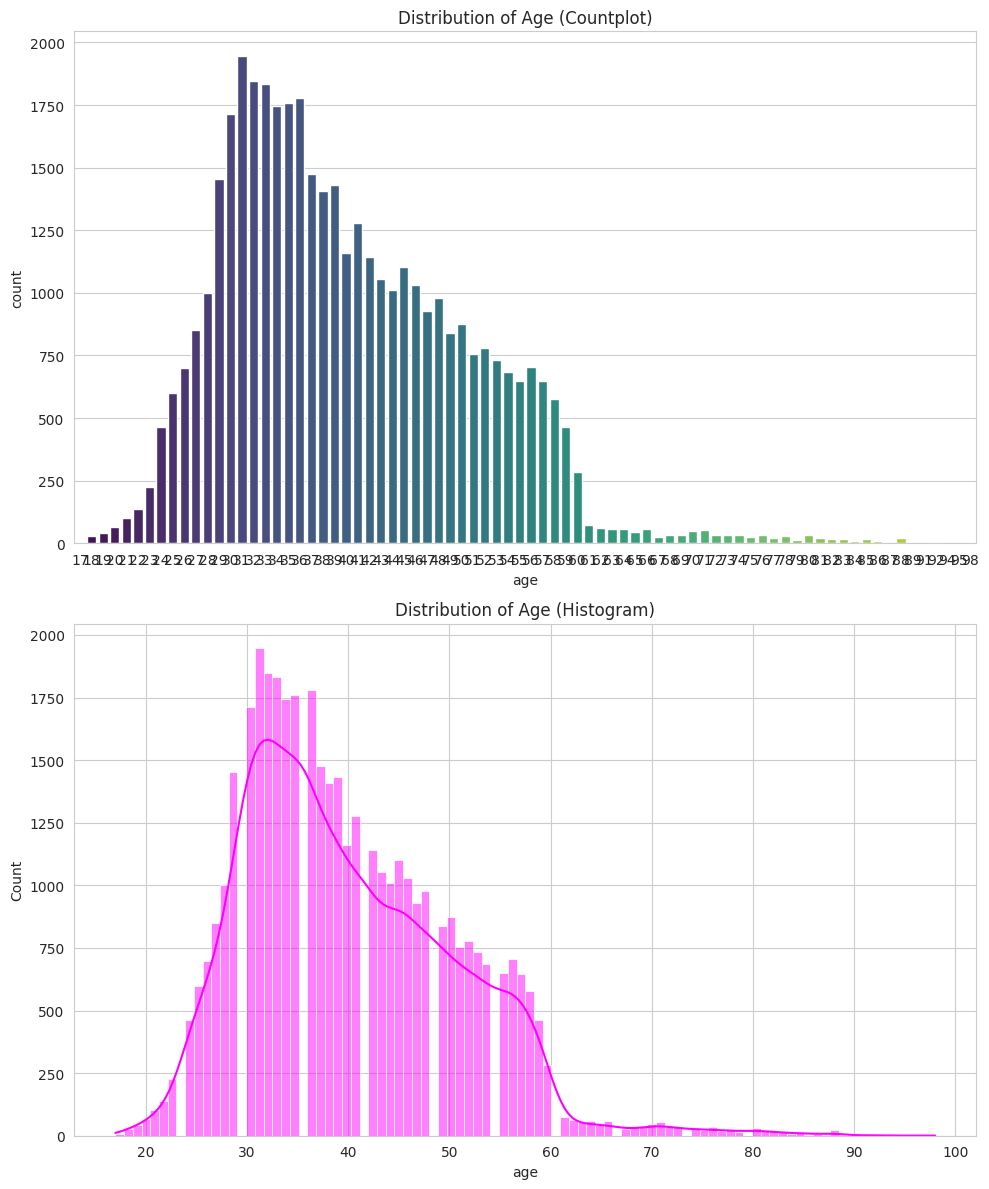

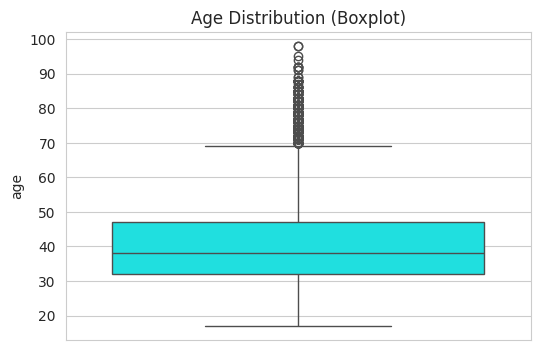

In [7]:
def analyze_age(df):
    print(f"Minimum Age: {df['age'].min()}")
    print(f"Maximum Age: {df['age'].max()}")

    missing_values = df['age'].isnull().sum()
    print(f"Missing values in 'Age': {missing_values}")

    fig, axes = plt.subplots(2, 1, figsize=(10, 12), tight_layout=True)
    sns.countplot(x='age', data=df, ax=axes[0], palette="viridis")
    axes[0].set_title("Distribution of Age (Countplot)")

    sns.histplot(x='age', data=df, ax=axes[1], color="magenta", kde=True)
    axes[1].set_title("Distribution of Age (Histogram)")

    plt.figure(figsize=(6, 4))
    sns.boxplot(y='age', data=df, color="cyan")
    plt.title("Age Distribution (Boxplot)")

    skewness = df['age'].skew()
    if skewness > 0.1:
        print(f"Skewness: {skewness}. The distribution has a right tail.")
    elif skewness < -0.1:
        print(f"Skewness: {skewness}. The distribution has a left tail.")
    else:
        print(f"Skewness: {skewness}. The distribution is relatively symmetric.")

    plt.show()

analyze_age(data)

***Детальний аналіз завдань 1-4***

**Опис датасету:**
- Розмірність датасету складає 41188 записів та 21 атрибут.
- Цільова змінна `y` визначає, чи оформив клієнт депозит (`yes` або `no`).

**Характеристики клієнтів банку:**
- Основні атрибути, що характеризують клієнтів, включають: `age`, `job`, `marital`, `education`, `default`, `housing`, `loan`.

**Аналіз атрибуту Age:**
- Діапазон віку клієнтів варіюється від 17 до 98 років.
- Відсутні пропущені значення у колонці `age`.
- Гістограма віку показує розподіл, схожий на нормальний, з домінуванням правого хвоста, де найчастіше зустрічається вік 31 рік.
- За допомогою боксплоту можна побачити, що медіана віку знаходиться приблизно на рівні 37-38 років. Перший квартиль (Q1) дорівнює 31-32 рокам, тоді як третій квартиль (Q3) — 46-47 рокам. На графіку також представлені окремі викиди віку, що перевищують звичайний діапазон.


**Завдання 5** Перевірити атрибут `Age` на викиди:

In [10]:
def identify_outliers(data_frame: pd.DataFrame, feature: str, lower_percentile: int, upper_percentile: int) -> pd.DataFrame:
    ordered_data = data_frame[feature].sort_values()
    first_quartile = np.percentile(ordered_data, lower_percentile)
    median_age = data_frame[feature].median()
    third_quartile = np.percentile(ordered_data, upper_percentile)

    print(f"\nFirst Quartile ({lower_percentile}%): {first_quartile}")
    print(f"Median Age: {median_age}")
    print(f"Third Quartile ({upper_percentile}%): {third_quartile}")
    print('\n' + '-' * 50)

    interquartile_range = third_quartile - first_quartile

    print(f"Interquartile Range: {interquartile_range}")
    print('\n' + '-' * 50)

    lower_bound = first_quartile - 1.5 * interquartile_range
    upper_bound = third_quartile + 1.5 * interquartile_range

    print(f"Lower Limit: {lower_bound}")
    print(f"Upper Limit: {upper_bound}")
    print('\n' + '-' * 50)

    outlier_data = data_frame[(data_frame[feature] > upper_bound) | (data_frame[feature] < lower_bound)]
    print("Identified Outliers:")
    display(outlier_data)

    return outlier_data

age_outliers = identify_outliers(data, 'age', 10, 90)


First Quartile (10%): 28.0
Median Age: 38.0
Third Quartile (90%): 55.0

--------------------------------------------------
Interquartile Range: 27.0

--------------------------------------------------
Lower Limit: -12.5
Upper Limit: 95.5

--------------------------------------------------
Identified Outliers:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38452,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,1,2,2,success,-3.4,92.431,-26.9,0.73,5017.5,yes
38455,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.73,5017.5,yes


***Висновки з завдання 5***

**Аналіз викидів змінної Age:**

1. **Перцентилі:** Використані 10-й та 90-й перцентилі для визначення меж квартилів. Рівень перцентилів впливає на ідентифікацію кількості викидів:
    - Чим вище значення нижнього перцентиля, тим більше викидів буде визначено в нижній границі.
    - Верхня границя показує кількість викидів за 90-й перцентиль.

2. **Медіана (Q2):** Становить 38 років, що вказує на середній вік клієнтів.

3. **Міжквартильний розмах (IQR):** Обчислений як різниця між третім (Q3) і першим (Q1) квартилями, відображає розмах основної маси даних за віком.

4. **Нижня межа (low_lim):**
    - Розрахована як \(Q1 - 1.5 \times IQR\).
    - Від'ємне значення нижньої межі (-12.5) не є практично прийнятним, адже вік не може бути від'ємним. Це вказує на відсутність викидів з низького боку.

5. **Верхня межа (up_lim):**
    - Розрахована як \(Q3 + 1.5 \times IQR\).
    - Значення, що перевищує 95.5 років, вважаються викидами. У датасеті є два спостереження з віком 98 років, що визначені як викиди.


**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

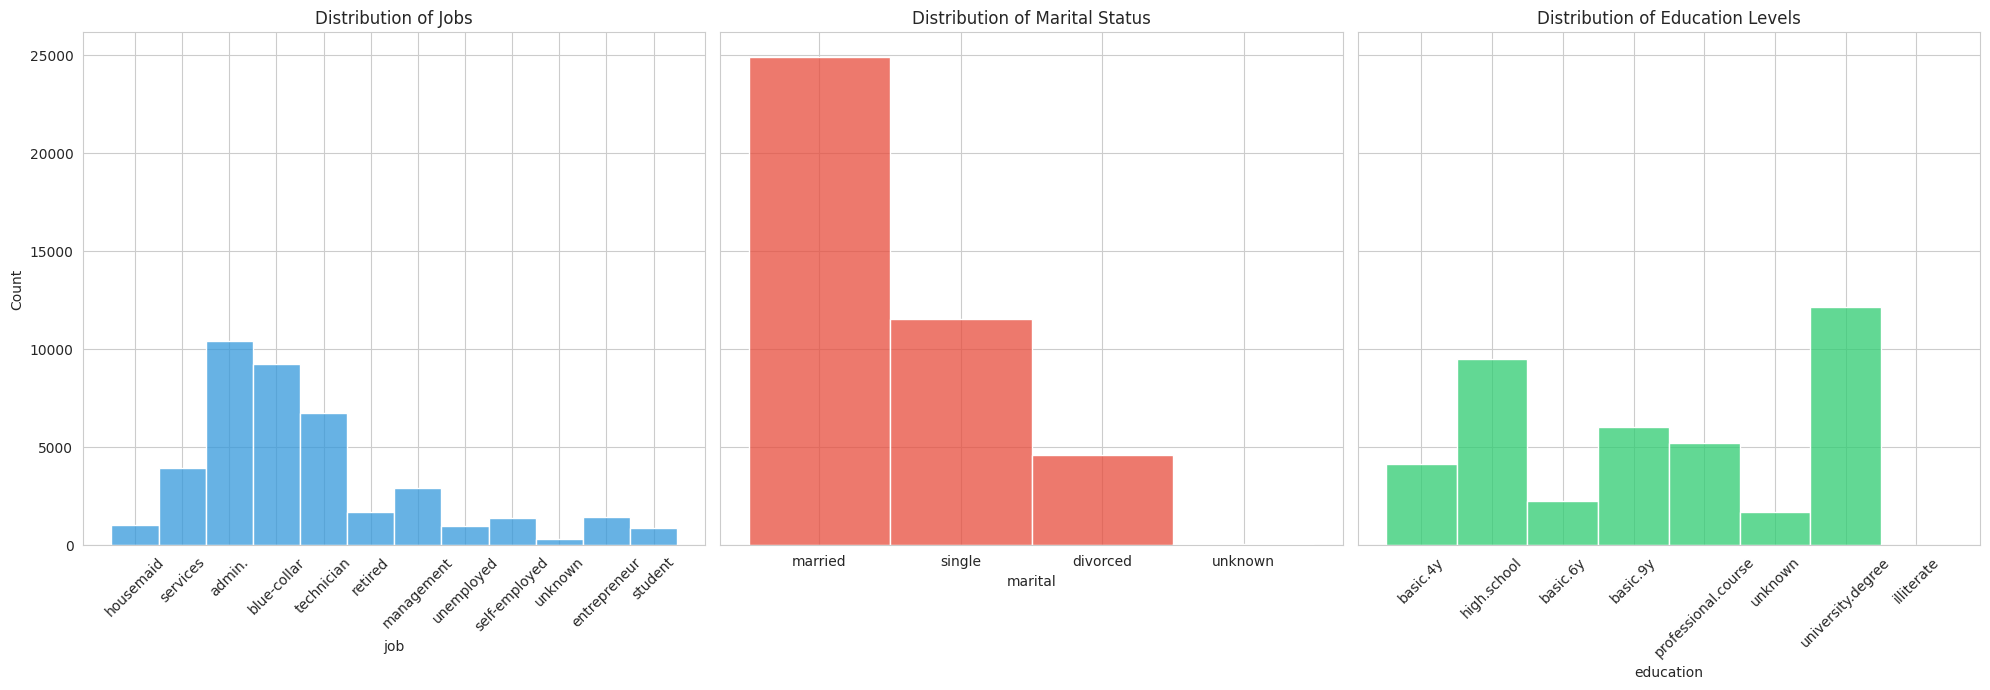

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)

sns.histplot(data=data, x="job", ax=axes[0], color="#3498db")
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title("Distribution of Jobs")

sns.histplot(data=data, x="marital", ax=axes[1], color="#e74c3c")
axes[1].set_title("Distribution of Marital Status")

sns.histplot(data=data, x="education", ax=axes[2], color="#2ecc71")
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_title("Distribution of Education Levels")

plt.tight_layout()
plt.show()

**Висновки з завдання 6 (детальні)**

***Детальні висновки з аналізу розподілу категоріальних змінних (Завдання 6)***

1. **Розподіл за професією (Job):**
   - Найпопулярнішою категорією серед професій є 'admin', що свідчить про велику кількість клієнтів з адміністративною роботою.
   - Найменше представлена категорія 'unknown', що може вказувати на дефіцит інформації про професійні сфери деяких клієнтів.

2. **Розподіл за сімейним станом (Marital):**
   - Переважна більшість клієнтів мають статус 'married', що може впливати на їхні фінансові потреби та рішення.
   - Категорія 'unknown' знову ж таки має мінімальну кількість записів, що вказує на хороше знання банком сімейного стану своїх клієнтів.

3. **Розподіл за освітою (Education):**
   - Найчастіше зустрічається вища освіта (university degree), що може свідчити про високий рівень освіченості клієнтів.
   - Друге місце за популярністю займає освіта середнього рівня (high school).
   - Аналогічно іншим категоріям, 'unknown' знову має найменше значень, підкреслюючи високу якість даних клієнтів банку.


**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

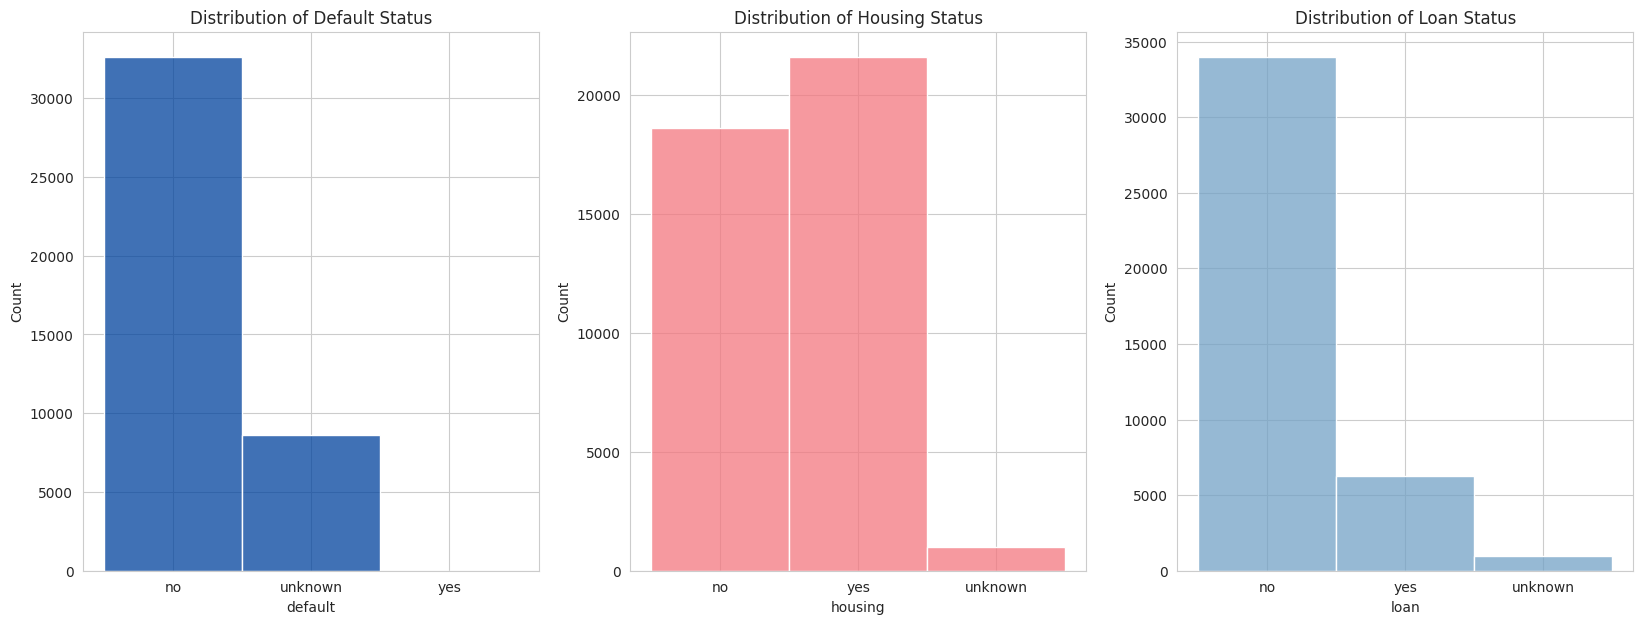

In [12]:
fig, ((ax_default, ax_housing, ax_loan)) = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(data=data, x="default", ax=ax_default, color="#00429d")
ax_default.set_title("Distribution of Default Status")

sns.histplot(data=data, x="housing", ax=ax_housing, color="#f4777f")
ax_housing.set_title("Distribution of Housing Status")

sns.histplot(data=data, x="loan", ax=ax_loan, color="#73a2c6")
ax_loan.set_title("Distribution of Loan Status")

plt.show()

**Висновки з аналізу категоріальних змінних `default`, `housing`, `loan`:**

1. **Default:**
   - Відповідає за кредитну історію клієнта, чи були прострочення по кредитах.
   - Більшість клієнтів (`mode`) не мали прострочень (`no`), що свідчить про добру кредитну історію більшості клієнтів.
   - Дуже мала кількість клієнтів має історію прострочення (`yes`).

2. **Housing:**
   - Вказує на наявність кредиту на житло у клієнта.
   - Більшість клієнтів мають кредит на житло (`yes`), що може відображати високу популярність іпотечних кредитів серед клієнтів.
   - Невелика кількість даних містить невідомі значення (`unknown`), що може вказувати на неповноту даних.

3. **Loan:**
   - Стосується загальних кредитів, крім іпотечних.
   - Більшість клієнтів не мають загальних кредитів (`no`), що може свідчити про обережність або недоступність кредитів для широкого кола клієнтів.
   - Категорія `unknown` також присутня, що вимагає уваги при подальшому аналізі для визначення причин неповноти даних.


**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [14]:
def convert_categorical_to_numerical(df: pd.DataFrame, cat_columns: list) -> pd.DataFrame:
    label_encoders = {}
    for column in cat_columns:
        if df[column].isnull().any():
            df[column] = df[column].fillna('Unknown')
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])
        label_encoders[column] = encoder
    return df, label_encoders

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
encoded_bank_client, encoders = convert_categorical_to_numerical(data.copy(), categorical_features)

display(encoded_bank_client.head(5))
print(encoded_bank_client.isnull().sum())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Кожну змінну було трансформовано у чисельну. Перевірка показала що немає ніяких пропусків отже все правильно.

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [15]:
def categorize_age(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    quartiles = df[column_name].quantile([0, 0.25, 0.5, 0.75, 1]).values
    labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']
    df['Age_Group'] = pd.cut(df[column_name], bins=quartiles, labels=labels, include_lowest=True)

    print("Quartile values for Age:")
    print(quartiles)

    return df

transformed_bank_client = categorize_age(data.copy(), 'age')
display(transformed_bank_client.head(3))

print("Missing values in 'Age_Group':", transformed_bank_client['Age_Group'].isnull().sum())

Quartile values for Age:
[17. 32. 38. 47. 98.]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Age_Group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Elderly
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Elderly
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Middle-aged


Missing values in 'Age_Group': 0


**Висновки до Завдання 9: Перевірка категоризації віку**

Квартильні значення для віку:
- Перший квартиль (25%): 32 роки
- Медіана (50%): 38 років
- Третій квартиль (75%): 47 років

Розподіл віку по категоріях:
- **Категорія 'Young'**: Включає вік від мінімального до 32 років.
- **Категорія 'Middle-aged'**: Від 32 до 38 років.
- **Категорія 'Senior'**: Від 38 до 47 років.
- **Категорія 'Elderly'**: Від 47 років до максимального віку.

Всі вікові категорії були правильно заповнені без пропусків. Це підтверджує, що кожна особа в датасеті отримала відповідний віковий бін від 0 до 3, згідно з її віком і встановленими квартильними порогами.


## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [16]:
def extract_bank_relationship_data(dataframe: pd.DataFrame, columns_list: list) -> pd.DataFrame:
    client_bank_interaction = dataframe[columns_list]
    display(client_bank_interaction.head())
    print(client_bank_interaction.isnull().sum())
    return client_bank_interaction

relationship_columns = ["contact", "month", "day_of_week", "duration"]
bank_relationship_data = extract_bank_relationship_data(data, relationship_columns)

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


contact        0
month          0
day_of_week    0
duration       0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [17]:
def display_unique_values(data_frame, column_list):
    for column in column_list:
        unique_values = data_frame[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

columns_to_check = ["contact", "month", "day_of_week"]
display_unique_values(bank_relationship_data, columns_to_check)

Unique values in column 'contact': ['telephone' 'cellular']
Unique values in column 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values in column 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

***Аналіз*** змінної Duration

Змінна `duration` відображає тривалість останнього дзвінка в секундах. Це ключова числова змінна, яка має значний вплив на цільову змінну `y`. Важливо зазначити, що якщо тривалість дзвінка становить 0 секунд, тоді результат (`y`) завжди буде "ні".

Однак є важливе обмеження щодо використання цієї змінної для прогнозування: тривалість дзвінка неможливо знати до його здійснення, і результат дзвінка стає відомим після його завершення. Тому, хоча змінна `duration` може бути корисною для аналізу і порівняння моделей, вона не повинна використовуватись у реалістичних прогнозних моделях.


**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`;
*   перевірити розподіл по змінній `duration` на важкі хвости.



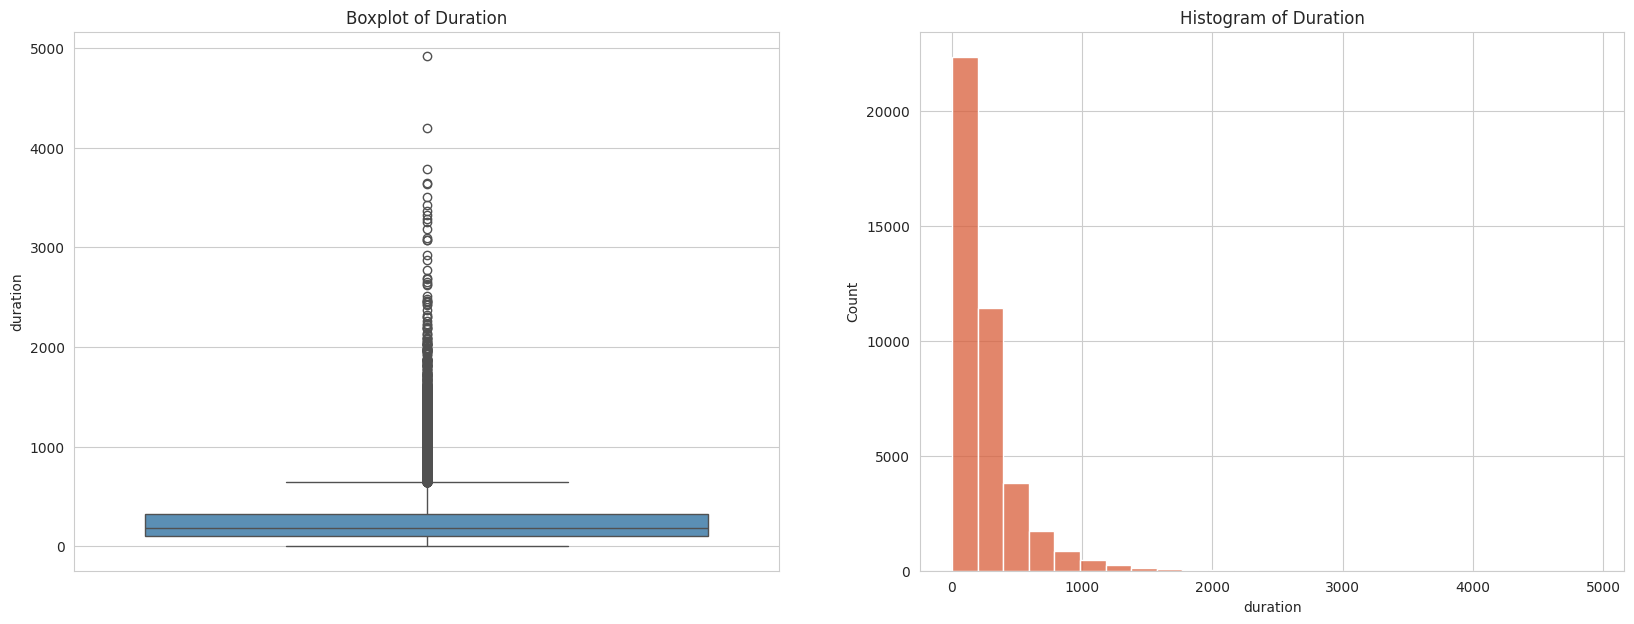

Skewness of duration: 3.263141255262832. The distribution has a right tail.


In [20]:
def check_skewness(skew_value, variable_name):
    if skew_value > 0.1:
        print(f"Skewness of {variable_name}: {skew_value}. The distribution has a right tail.")
    elif skew_value < -0.1:
        print(f"Skewness of {variable_name}: {skew_value}. The distribution has a left tail.")
    else:
        print(f"Skewness of {variable_name}: {skew_value}. The distribution is relatively symmetric.")


fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 7))

sns.boxplot(data=data, y="duration", ax=axis1, color="#4C92C3")
axis1.set_title("Boxplot of Duration")

sns.histplot(data, x="duration", ax=axis2, color="#D95D39", bins=25)
axis2.set_title("Histogram of Duration")

plt.show()

duration_skewness = data["duration"].skew()
check_skewness(duration_skewness, "duration")

***Висновки з завдання 12***

- **Розподіл тривалості дзвінків**: Графік показує, що розподіл має форму, яка схожа на експоненційний розподіл з важчим правим хвостом. Це означає, що хоча більшість дзвінків тривають відносно недовго, існує значна кількість дуже тривалих дзвінків.
- **Короткі та тривалі дзвінки**: Більшість дзвінків мають тривалість до приблизно 1000 секунд (що становить близько 16-17 хвилин). Водночас, дзвінки, які тривають довше, відзначаються як винятки.
- **Боксплот (Boxplot)**: На боксплоті видно, що медіана значень знаходиться досить низько, що вказує на коротку середню тривалість дзвінків. Типовий діапазон (інтерквартильний діапазон) знаходиться в межах від 0 до 400 секунд. Викиди поза цим діапазоном є численними, особливо ті, що перевищують 700 секунд, що підкреслює наявність тривалих дзвінків, які не є характерними для більшості клієнтів.


**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [26]:
def encode_contact_columns(df, cols_to_encode):
    for col in cols_to_encode:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

encoded_relationship_data = encode_contact_columns(data.copy(), ['contact', 'month', 'day_of_week'])
display(encoded_relationship_data.head(3))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('job').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('default').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('housing').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='age', y='duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['contact']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('contact', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('job')):
  _plot_series(series, series_name, i)
  fig.legend(title='job', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('contact')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['contact']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('contact', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('education')):
  _plot_series(series, series_name, i)
  fig.legend(title='education', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('contact')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['contact']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('contact', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('default')):
  _plot_series(series, series_name, i)
  fig.legend(title='default', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('contact')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['contact']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('contact', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('housing')):
  _plot_series(series, series_name, i)
  fig.legend(title='housing', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('contact')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
_df_11['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['education'].value_counts()
    for x_label, grp in _df_13.groupby('job')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('job')
_ = plt.ylabel('education')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['default'].value_counts()
    for x_label, grp in _df_14.groupby('education')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('education')
_ = plt.ylabel('default')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['housing'].value_counts()
    for x_label, grp in _df_15.groupby('default')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('default')
_ = plt.ylabel('housing')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['job'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='age', y='job', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['education'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='age', y='education', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['default'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='age', y='default', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['housing'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='age', y='housing', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [38]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
  q_values = dataframe[duration_col].quantile([0, 0.25, 0.5, 0.75, 1])
  q_labels = [0, 1, 2, 3]

  print(q_values)

  dataframe["duration_bins"] = pd.cut(dataframe[duration_col], bins=q_values, labels=q_labels, include_lowest=True)

  return dataframe

In [ ]:
bank_relat = encode_duration(relationship_columns, 'duration')
display(bank_relat.head(3))
bank_relat.isnull().sum()

0.00       0.0
0.25     102.0
0.50     180.0
0.75     319.0
1.00    4918.0
Name: duration, dtype: float64


,contact,month,day_of_week,duration,duration_bins
0,1,6,1,261,2
1,1,6,1,149,1
2,1,6,1,226,2


contact          0
month            0
day_of_week      0
duration         0
duration_bins    0
dtype: int64

In [30]:
def categorize_duration(df: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    quartile_values = df[duration_col].quantile([0, 0.25, 0.5, 0.75, 1])
    category_labels = [0, 1, 2, 3]

    print("Quartile values for duration:")
    print(quartile_values)

    df["duration_category"] = pd.cut(df[duration_col], bins=quartile_values, labels=category_labels, include_lowest=True)

    return df

bank_relations = categorize_duration(data.copy(), 'duration')
display(bank_relations.head(3))
bank_relations.isnull().sum()

Quartile values for duration:
0.00       0.0
0.25     102.0
0.50     180.0
0.75     319.0
1.00    4918.0
Name: duration, dtype: float64


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_category
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2


age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
duration_category    0
dtype: int64

Всі колонки трансформувались правильно, оскільки пропусків немає.

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [32]:
bank_dataframe = data[["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]]
display(bank_dataframe.head(5))

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [33]:
bank_data = data[["campaign", "pdays", "previous", "poutcome"]]
display(bank_data.head(5))

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [37]:
display(bank_data["poutcome"].unique().tolist())

bank_other = convert_categorical_to_numerical(bank_data, ['poutcome'])
display(bank_other)

[1, 0, 2]

(       campaign  pdays  previous  poutcome
 0             1    999         0         1
 1             1    999         0         1
 2             1    999         0         1
 3             1    999         0         1
 4             1    999         0         1
 ...         ...    ...       ...       ...
 41183         1    999         0         1
 41184         1    999         0         1
 41185         2    999         0         1
 41186         1    999         0         1
 41187         3    999         1         0
 
 [41188 rows x 4 columns],
 {'poutcome': LabelEncoder()})